In [1]:
import re
import copy
import numpy as np
import pandas as pd
node = []
allDatas = []
siganlList = []
SignalsName = []
messageName = []

In [2]:
def readFile(file_name):
    global node,allDatas,siganlList,SignalsName,messageName
    ''' 得到dbc文件的绝对路径'''
    filePath = file_name
    if filePath:
        print(filePath)
        f = open(filePath, "r")  # 设置文件对象
    else:
        print("读取文件失败！")
        return 0
    """
    NodesPattern:节点
    MessagePattern：消息
    SignalPattern：信号
    """
    NodesPattern = re.compile(r"BU_: (.*)", re.S)
    MessagePattern = re.compile(r"BO_ (.*?) (.*?): (.*?) (.*)", re.S)
#     SignalPattern = re.compile('''SG_ (.*?) : (.*?)\|(.*?)@.*? \((.*?),(.*?)\) \[(.*?)\|(.*?)\] "(.*?)" (.*)''', re.S)
    SignalPattern = re.compile('''SG_ (.*?) : (.*?)\|(.*?)@([0-9])([+|-]) \((.*?),(.*?)\) \[(.*?)\|(.*?)\] "(.*?)" (.*)''', re.S)
    DefaultValue = '''BA_ "GenSig(.*?)" SG_ (\d+) signalname (\d+);'''

    line = f.readline()
    allDatas=[]
    while line:
        """ 匹配出节点 """
        NodesSearched = re.search(NodesPattern, line.strip())
        if NodesSearched:
            node = NodesSearched.group(1).split(" ")
            #print(node)
        """ 匹配出消息 """
        MessageSearched = re.search(MessagePattern, line.strip())
        if MessageSearched:
            siganlList.clear()
            """如果匹配到了message，则获取到message的相关参数 
             比如匹配到了NM_Message_ESC_409，则会解析出改message的一些参数构成list对象['1033', 'NM_Message_ESC_409', '8', 'ESC']
             这四个参数分别是 messgage ID ;message name ; messgae dataLenth ,message sender
             而且把这个list对象 加在了 siganlList 索引0的位置
            """
            Message = list(MessageSearched.groups())
            siganlList.append(Message)
            """ 只 要 message的名字 messageName 列表中"""
            messageName.append(Message[1])
            """读取下一行"""
            line = f.readline()
            """因为有些message并没有定义signal，所以 下一行还是message"""
            MessageSearched = re.search(MessagePattern, line.strip())
            SignalSearched = re.search(SignalPattern, line.strip())
            """下一行如果不是message的内容 就一定是signal的内容了"""
            if not MessageSearched:
                while SignalSearched:
                    """获取信号的参数追加到siganlList"""
                    signal = list(SignalSearched.groups())
                    siganlList.append(signal)
                    """只获取 signal name"""
                    SignalsName.append(signal[0])

                    # 再次解析信号，直到这个message下的信号全部解析完毕
                    line = f.readline()
                    SignalSearched = re.search(SignalPattern, line.strip())
           # print(siganlList)
            c = copy.deepcopy(siganlList)
            allDatas.append(c)
        else:
            line = f.readline()
            MessageSearched = re.search(MessagePattern, line.strip())
    f.close()  # 将文件关闭
    return 1

In [3]:
import os
file_names = []
# path = os.path.abspath('./My_DBC')
path = os.path.abspath('./opendbc-master/opendbc-master')
dirs = os.listdir(path)                    # 获取指定路径下的文件
for i in dirs:
    if os.path.splitext(i)[1] == ".dbc":
        file_names.append(os.path.join(path,i))
file_names

['D:\\--storage--\\program\\Code\\jupyter-notebook\\CarNetworkIDS\\Code\\MyTask\\opendbc-master\\opendbc-master\\acura_ilx_2016_can_generated.dbc',
 'D:\\--storage--\\program\\Code\\jupyter-notebook\\CarNetworkIDS\\Code\\MyTask\\opendbc-master\\opendbc-master\\acura_ilx_2016_nidec.dbc',
 'D:\\--storage--\\program\\Code\\jupyter-notebook\\CarNetworkIDS\\Code\\MyTask\\opendbc-master\\opendbc-master\\acura_rdx_2018_can_generated.dbc',
 'D:\\--storage--\\program\\Code\\jupyter-notebook\\CarNetworkIDS\\Code\\MyTask\\opendbc-master\\opendbc-master\\acura_rdx_2020_can_generated.dbc',
 'D:\\--storage--\\program\\Code\\jupyter-notebook\\CarNetworkIDS\\Code\\MyTask\\opendbc-master\\opendbc-master\\bmw_e9x_e8x.dbc',
 'D:\\--storage--\\program\\Code\\jupyter-notebook\\CarNetworkIDS\\Code\\MyTask\\opendbc-master\\opendbc-master\\cadillac_ct6_chassis.dbc',
 'D:\\--storage--\\program\\Code\\jupyter-notebook\\CarNetworkIDS\\Code\\MyTask\\opendbc-master\\opendbc-master\\cadillac_ct6_object.dbc',
 'D:\\

In [4]:
def findOverlap():
    file_message = []
    total_big = 0
    total_little = 0
    for message in allDatas:
        big = 0
        little = 0
        message_id = message[0][0]+"_"+message[0][1]
        del message[0]
        for signal in message:
            endianness = int(signal[3])
            if endianness == 0:
                big = big + 1
                total_big = total_big + 1
            if endianness == 1:
                little = little + 1
                total_little = total_little + 1
        file_message.append([big, little])
    return file_message, total_big, total_little

In [5]:
all_file_message = []
all_total_little = []
for file_name in file_names:
    cur_name = file_name.split("\\")[-1]
    readFile(file_name)
    file_message, total_big, total_little = findOverlap()
    all_file_message.append(file_message)
    all_total_little.append([total_big, total_little])

D:\--storage--\program\Code\jupyter-notebook\CarNetworkIDS\Code\MyTask\opendbc-master\opendbc-master\acura_ilx_2016_can_generated.dbc
D:\--storage--\program\Code\jupyter-notebook\CarNetworkIDS\Code\MyTask\opendbc-master\opendbc-master\acura_ilx_2016_nidec.dbc
D:\--storage--\program\Code\jupyter-notebook\CarNetworkIDS\Code\MyTask\opendbc-master\opendbc-master\acura_rdx_2018_can_generated.dbc
D:\--storage--\program\Code\jupyter-notebook\CarNetworkIDS\Code\MyTask\opendbc-master\opendbc-master\acura_rdx_2020_can_generated.dbc
D:\--storage--\program\Code\jupyter-notebook\CarNetworkIDS\Code\MyTask\opendbc-master\opendbc-master\bmw_e9x_e8x.dbc
D:\--storage--\program\Code\jupyter-notebook\CarNetworkIDS\Code\MyTask\opendbc-master\opendbc-master\cadillac_ct6_chassis.dbc
D:\--storage--\program\Code\jupyter-notebook\CarNetworkIDS\Code\MyTask\opendbc-master\opendbc-master\cadillac_ct6_object.dbc
D:\--storage--\program\Code\jupyter-notebook\CarNetworkIDS\Code\MyTask\opendbc-master\opendbc-master\cad

D:\--storage--\program\Code\jupyter-notebook\CarNetworkIDS\Code\MyTask\opendbc-master\opendbc-master\volvo_v40_2017_pt.dbc
D:\--storage--\program\Code\jupyter-notebook\CarNetworkIDS\Code\MyTask\opendbc-master\opendbc-master\volvo_v60_2015_pt.dbc
D:\--storage--\program\Code\jupyter-notebook\CarNetworkIDS\Code\MyTask\opendbc-master\opendbc-master\vw_golf_mk4.dbc
D:\--storage--\program\Code\jupyter-notebook\CarNetworkIDS\Code\MyTask\opendbc-master\opendbc-master\vw_mqb_2010.dbc


In [6]:
readFile(file_names[4])

D:\--storage--\program\Code\jupyter-notebook\CarNetworkIDS\Code\MyTask\opendbc-master\opendbc-master\bmw_e9x_e8x.dbc


1

In [7]:
allDatas

[[['170', 'AccPedal', '8', 'XXX'],
  ['KickDownPressed', '53', '1', '0', '+', '1', '0', '0', '3', '', 'XXX'],
  ['CruisePedalActive', '54', '1', '0', '+', '1', '0', '0', '1', '', 'XXX'],
  ['CruisePedalInactive', '55', '1', '0', '+', '1', '0', '0', '1', '', 'XXX'],
  ['ThrottlelPressed', '50', '1', '0', '+', '1', '0', '0', '1', '', 'XXX'],
  ['AcceleratorPedalPressed',
   '52',
   '1',
   '0',
   '+',
   '1',
   '0',
   '0',
   '7',
   '',
   'XXX'],
  ['AcceleratorPedalPercentage',
   '16',
   '16',
   '1',
   '+',
   '0.01',
   '0',
   '0',
   '100',
   '',
   'XXX'],
  ['Counter1', '8', '4', '1', '+', '1', '0', '0', '15', '', 'XXX'],
  ['EngineSpeed', '32', '16', '1', '-', '1', '0', '0', '65535', '', 'XXX'],
  ['unknown', '7', '8', '0', '-', '1', '0', '0', '65535', '', 'XXX']],
 [['404', 'CruiseControl', '4', 'XXX'],
  ['plus1mph_request', '16', '1', '0', '+', '1', '0', '0', '1', '', 'XXX'],
  ['minus1mph_request', '18', '1', '0', '+', '1', '0', '0', '1', '', 'XXX'],
  ['Cancel_requ

In [8]:
# 发现opendbc采集的文件确实不行，有的只采集了messagelen，连信号都没有

In [9]:
all_total_little

[[221, 0],
 [69, 0],
 [223, 0],
 [340, 8],
 [55, 25],
 [23, 0],
 [2720, 0],
 [81, 0],
 [177, 0],
 [122, 0],
 [5, 0],
 [866, 2],
 [741, 70],
 [829, 0],
 [1164, 0],
 [256, 0],
 [67, 0],
 [2142, 0],
 [9, 0],
 [111, 14],
 [25, 0],
 [3210, 0],
 [520, 0],
 [1, 8],
 [105, 2],
 [351, 8],
 [345, 9],
 [340, 11],
 [256, 1],
 [260, 1],
 [223, 0],
 [4, 0],
 [346, 8],
 [340, 8],
 [223, 0],
 [230, 1],
 [232, 1],
 [340, 8],
 [247, 1],
 [237, 1],
 [0, 1154],
 [1184, 0],
 [0, 415],
 [38, 1280],
 [320, 0],
 [45, 14],
 [455, 54],
 [231, 15],
 [91, 6],
 [123, 7],
 [133, 4],
 [79, 6],
 [4, 140],
 [12, 188],
 [10, 156],
 [3, 149],
 [3, 149],
 [141, 344],
 [0, 74],
 [5, 1032],
 [1315, 0],
 [176, 0],
 [68, 4],
 [256, 2],
 [274, 2],
 [78, 0],
 [257, 2],
 [180, 0],
 [163, 2],
 [98, 3],
 [6, 1219],
 [0, 1116]]

In [10]:
(pd.DataFrame(all_total_little).iloc[:,1]==0).sum()

27

In [11]:
pd.DataFrame(all_total_little).sum()

0    23804
1     7724
dtype: int64

In [12]:
pd.DataFrame(all_total_little).shape

(72, 2)

In [13]:
23804/7724

3.081822889694459

In [14]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

Text(0.5, 0, 'DBC文件')

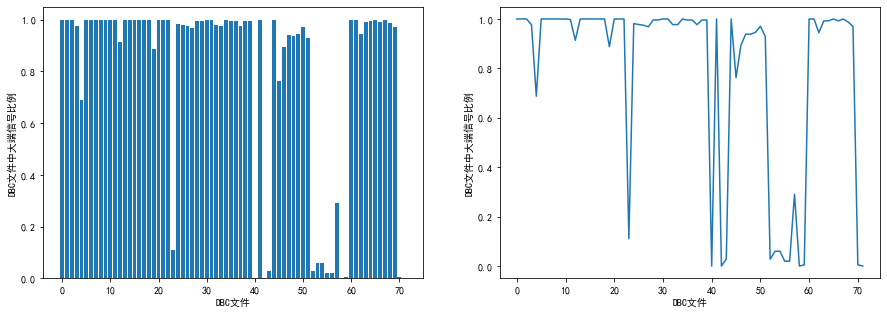

In [15]:
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot(1,2,1)
ax1.bar(np.arange(len(all_total_little)),pd.DataFrame(all_total_little).apply(lambda x: x[0]/sum(x), axis=1))
plt.ylabel("DBC文件中大端信号比例")
plt.xlabel("DBC文件")
ax2 = plt.subplot(1,2,2)
ax2.plot(pd.DataFrame(all_total_little).apply(lambda x: x[0]/sum(x), axis=1))
plt.ylabel("DBC文件中大端信号比例")
plt.xlabel("DBC文件")

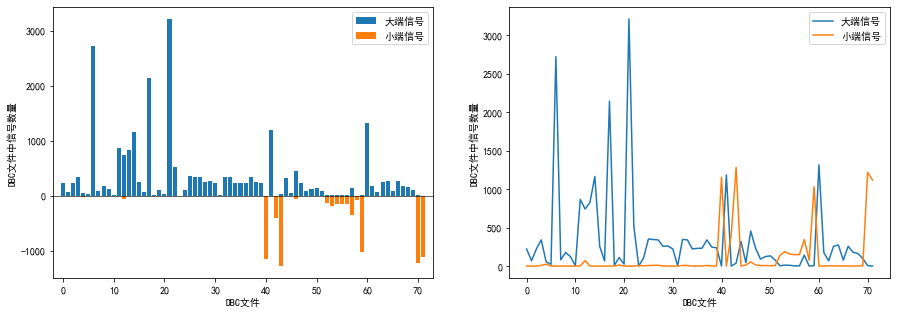

In [40]:
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot(1,2,1)
ax1.bar(np.arange(len(all_total_little)),pd.DataFrame(all_total_little).iloc[:,0], label='大端信号')
plt.hlines(0,-5,73, colors='black', linewidth=0.6)
plt.xlim(-2,73)
ax1.bar(np.arange(len(all_total_little)),-1*pd.DataFrame(all_total_little).iloc[:,1], label='小端信号')
plt.ylabel("DBC文件中信号数量")
plt.xlabel("DBC文件")
plt.legend()
ax2 = plt.subplot(1,2,2)
ax2.plot(pd.DataFrame(all_total_little).iloc[:,0], label='大端信号')
ax2.plot(pd.DataFrame(all_total_little).iloc[:,1], label='小端信号')
plt.ylabel("DBC文件中信号数量")
plt.xlabel("DBC文件")
plt.legend()

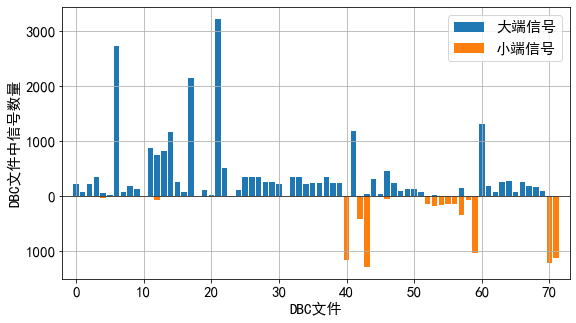

In [23]:
from matplotlib import gridspec
fig = plt.figure(figsize=(15,5))
spec = gridspec.GridSpec(ncols=2, nrows=1,
                         width_ratios=[2, 1])
ax1 = fig.add_subplot(spec[0])
ax1.bar(np.arange(len(all_total_little)),pd.DataFrame(all_total_little).iloc[:,0], label='大端信号')
plt.hlines(0,-5,73, colors='black', linewidth=0.6)
plt.xlim(-2,73)
plt.grid()
ax1.bar(np.arange(len(all_total_little)),-1*pd.DataFrame(all_total_little).iloc[:,1], label='小端信号')
plt.yticks([-1000,0,1000,2000,3000],[1000,0,1000,2000,3000])
plt.ylabel("DBC文件中信号数量",fontsize='15')
plt.xlabel("DBC文件",fontsize='15')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# ax1.set_title("(a)",fontsize=20, x=-0.07, y=0.98)
plt.legend(fontsize='15')




# x = data.groupby('等级').count()['日期'].values
# x = np.roll(np.append(data.groupby('等级').count()['日期'].values, 0), 1)

# wedges, texts, autotexts = ax2.pie(finx, colors=colors, radius=1.3, center=(4, 4),
#        wedgeprops={"linewidth": 1, "edgecolor": "white"}, 
#                                    autopct=lambda pct: func(pct, finx),
#                                    textprops=font2)
# #                                   textprops={'fontsize': 1, 'color': 'w'})

# ax2.legend(wedges, ingredients,
#            title="Fire danger rating",
# #           loc="upper left",
#            loc=(1.03,0.68),
# #            bbox_to_anchor=(1.1, 0, 0.3, 1),
#            prop=font,
# #            fontsize=12,
#            title_fontsize=13,
# #            ncol=2,
#            labelspacing=0.1,
# #            textStyle="Times New Roman",
#            borderaxespad=0.3)
# # plt.setp(autotexts, size=18, weight="bold")
# plt.legend()

(array([], dtype=float64), [])

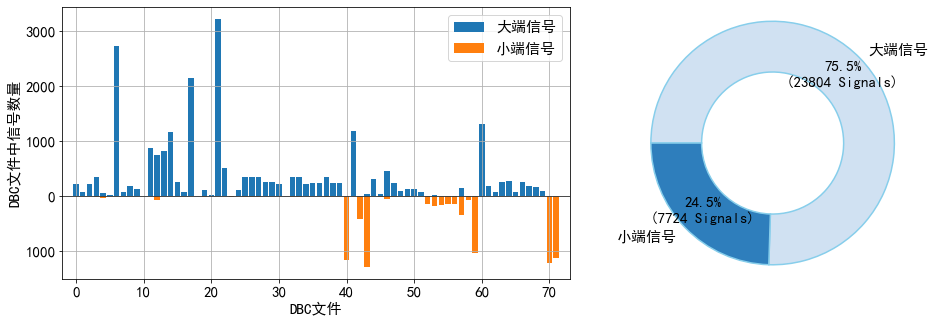

In [42]:
from matplotlib import gridspec
fig = plt.figure(figsize=(15,5))
spec = gridspec.GridSpec(ncols=2, nrows=1,
                         width_ratios=[2, 1])
ax1 = fig.add_subplot(spec[0])
ax1.bar(np.arange(len(all_total_little)),pd.DataFrame(all_total_little).iloc[:,0], label='大端信号')
plt.hlines(0,-5,73, colors='black', linewidth=0.6)
plt.xlim(-2,73)
plt.grid()
ax1.bar(np.arange(len(all_total_little)),-1*pd.DataFrame(all_total_little).iloc[:,1], label='小端信号')
plt.yticks([-1000,0,1000,2000,3000],[1000,0,1000,2000,3000])
plt.ylabel("DBC文件中信号数量",fontsize='15')
plt.xlabel("DBC文件",fontsize='15')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# ax1.set_title("(a)",fontsize=20, x=-0.07, y=0.98)
plt.legend(fontsize='15')

ax2 = fig.add_subplot(spec[1])
recipe = ["1 1", "2 2"]
# finx = data.groupby('等级').count()['日期'].values
finx = np.roll(pd.DataFrame(all_total_little).sum(), 1)
ingredients = ['大端信号']
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(finx)))
labels = ['大端信号','小端信号']
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} Signals)".format(pct, absolute)
# 绘制饼图
plt.pie(x = pd.DataFrame(all_total_little).sum(),         # 绘图数据        
#         explode=explode,       # 突出显示特定人群
        labels=labels,         # 添加教育水平标签
        colors=colors,         # 设置饼图的自定义填充色
        autopct=lambda pct: func(pct, finx),      # 设置百分比的格式，这里保留一位小数
        pctdistance=0.8,       # 设置百分比标签与圆心的距离
        labeldistance = 1.1,  # 设置教育水平标签与圆心的距离
        startangle = 180,      # 设置饼图的初始角度
        radius = 1.2,          # 设置饼图的半径
        counterclock = False, # 是否逆时针，这里设置为顺时针方向
        # 设置饼图内外边界的属性值：linewidth表示饼图内外边框线宽度；width表示饼图内外宽度，可控制生成环形图；edgecolor表示边框线的颜色        
        wedgeprops = {'linewidth': 1.5,'width':0.5, 'edgecolor':'skyblue'},  
        textprops = {'fontsize':15, 'color':'k'},   # 设置文本标签的属性值
        center = (0,0),        # 设置饼图的原点
        frame = 0)             # 是否显示饼图的图框，这里设置不显示
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# ax2.set_title("(b)",fontsize=20, x=-0.07, y=0.98)

(array([], dtype=float64), [])

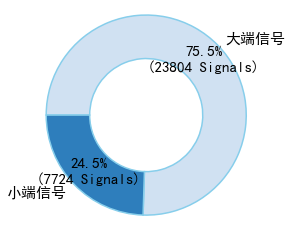

In [40]:
ax2 = fig.add_subplot(spec[1])
recipe = ["1 1", "2 2"]
# finx = data.groupby('等级').count()['日期'].values
finx = np.roll(pd.DataFrame(all_total_little).sum(), 1)
ingredients = ['大端信号']
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(finx)))
labels = ['大端信号','小端信号']
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} Signals)".format(pct, absolute)
# 绘制饼图
plt.pie(x = pd.DataFrame(all_total_little).sum(),         # 绘图数据        
#         explode=explode,       # 突出显示特定人群
        labels=labels,         # 添加教育水平标签
        colors=colors,         # 设置饼图的自定义填充色
        autopct=lambda pct: func(pct, finx),      # 设置百分比的格式，这里保留一位小数
        pctdistance=0.8,       # 设置百分比标签与圆心的距离
        labeldistance = 1.1,  # 设置教育水平标签与圆心的距离
        startangle = 180,      # 设置饼图的初始角度
        radius = 1.15,          # 设置饼图的半径
        counterclock = False, # 是否逆时针，这里设置为顺时针方向
        # 设置饼图内外边界的属性值：linewidth表示饼图内外边框线宽度；width表示饼图内外宽度，可控制生成环形图；edgecolor表示边框线的颜色        
        wedgeprops = {'linewidth': 1.5,'width':0.5, 'edgecolor':'skyblue'},  
        textprops = {'fontsize':15, 'color':'k'},   # 设置文本标签的属性值
        center = (0,0),        # 设置饼图的原点
        frame = 0)             # 是否显示饼图的图框，这里设置不显示
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# ax2.set_title("(b)",fontsize=20, x=-0.07, y=0.98)


<BarContainer object of 72 artists>

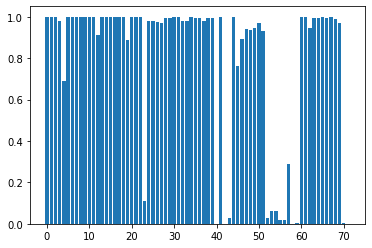

In [12]:
plt.bar(np.arange(len(all_total_little)),pd.DataFrame(all_total_little).apply(lambda x: x[0]/sum(x), axis=1))

In [18]:
(pd.DataFrame(all_total_little).apply(lambda x: x[0]/sum(x), axis=1)).apply(lambda x: x<0.9).sum()

18

In [17]:
(pd.DataFrame(all_total_little).apply(lambda x: x[0]/sum(x), axis=1)).apply(lambda x: x<0.8).sum()

16

<BarContainer object of 73 artists>

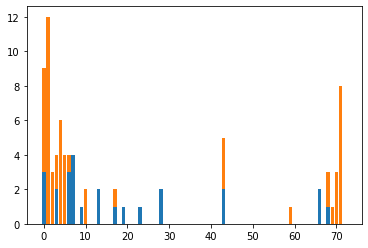

In [79]:
cur_file = all_file_message[4]
plt.bar(np.arange(len(cur_file)), pd.DataFrame(cur_file).iloc[:,1],label='little')
plt.bar(np.arange(len(cur_file)), pd.DataFrame(cur_file).iloc[:,0],bottom=pd.DataFrame(cur_file).iloc[:,1],label='big')

In [71]:
#  pd.DataFrame(cur_file)

In [42]:
file_names[46]

'D:\\--storage--\\program\\Code\\jupyter-notebook\\CarNetworkIDS\\Code\\MyTask\\opendbc-master\\opendbc-master\\mazda_2017.dbc'

(-2.0, 101.0)

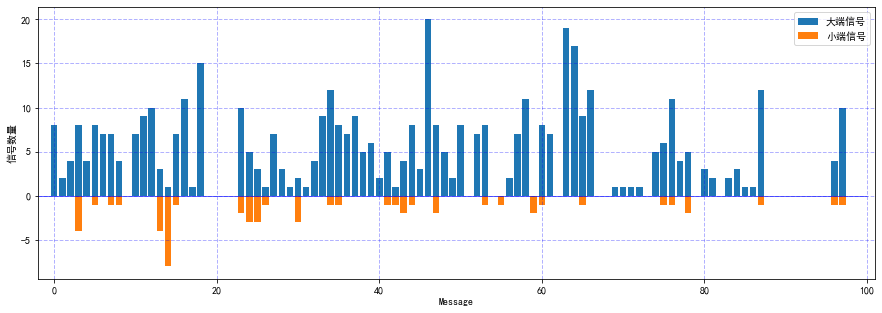

In [50]:
cur_file = all_file_message[46]
fig = plt.figure(facecolor="white", figsize=(15,5))
plt.grid(color='blue', linestyle='--', linewidth=1,alpha=0.3)
plt.hlines(0,-2,100, colors='blue', linewidth=0.6)
plt.bar(np.arange(len(cur_file)), pd.DataFrame(cur_file).iloc[:,0],width=0.8, label='大端信号')
plt.bar(np.arange(len(cur_file)), pd.DataFrame(cur_file).iloc[:,1]*(-1),width=0.8, label='小端信号')
plt.ylabel("信号数量")
plt.xlabel("Message")
plt.legend()
plt.xlim(-2,len(cur_file))

In [18]:
len(overlap_res), overlap_res

(72,
 [{'acura_ilx_2016_can_generated.dbc': ['829_LKAS_HUD']},
  {'acura_ilx_2016_nidec.dbc': []},
  {'acura_rdx_2018_can_generated.dbc': ['829_LKAS_HUD']},
  {'acura_rdx_2020_can_generated.dbc': ['829_LKAS_HUD',
    '13274_LKAS_HUD_A',
    '13275_LKAS_HUD_B']},
  {'bmw_e9x_e8x.dbc': ['170_AccPedal',
    '191_RequestedWheelTorqueDriveTrainActiveCruiseControl']},
  {'cadillac_ct6_chassis.dbc': []},
  {'cadillac_ct6_object.dbc': []},
  {'cadillac_ct6_powertrain.dbc': []},
  {'chrysler_pacifica_2017_hybrid.dbc': []},
  {'chrysler_pacifica_2017_hybrid_private_fusion.dbc': []},
  {'comma_body.dbc': []},
  {'ESR.dbc': ['1489_SensorValidation2']},
  {'FORD_CADS.dbc': ['1073741824_VECTOR__INDEPENDENT_SIG_MSG']},
  {'ford_cgea1_2_bodycan_2011.dbc': []},
  {'ford_cgea1_2_ptcan_2011.dbc': []},
  {'ford_fusion_2018_adas.dbc': []},
  {'ford_fusion_2018_pt.dbc': []},
  {'ford_lincoln_base_pt.dbc': []},
  {'gm_global_a_chassis.dbc': []},
  {'gm_global_a_high_voltage_management.dbc': ['512_Battery_Mod

In [19]:
len(overlap_true_res), overlap_true_res

(72,
 [{'acura_ilx_2016_can_generated.dbc': ['829_LKAS_HUD']},
  {'acura_ilx_2016_nidec.dbc': []},
  {'acura_rdx_2018_can_generated.dbc': ['829_LKAS_HUD']},
  {'acura_rdx_2020_can_generated.dbc': ['829_LKAS_HUD',
    '13274_LKAS_HUD_A',
    '13275_LKAS_HUD_B']},
  {'bmw_e9x_e8x.dbc': ['170_AccPedal',
    '191_RequestedWheelTorqueDriveTrainActiveCruiseControl']},
  {'cadillac_ct6_chassis.dbc': []},
  {'cadillac_ct6_object.dbc': []},
  {'cadillac_ct6_powertrain.dbc': []},
  {'chrysler_pacifica_2017_hybrid.dbc': []},
  {'chrysler_pacifica_2017_hybrid_private_fusion.dbc': []},
  {'comma_body.dbc': []},
  {'ESR.dbc': ['1489_SensorValidation2']},
  {'FORD_CADS.dbc': ['1073741824_VECTOR__INDEPENDENT_SIG_MSG']},
  {'ford_cgea1_2_bodycan_2011.dbc': []},
  {'ford_cgea1_2_ptcan_2011.dbc': []},
  {'ford_fusion_2018_adas.dbc': []},
  {'ford_fusion_2018_pt.dbc': []},
  {'ford_lincoln_base_pt.dbc': []},
  {'gm_global_a_chassis.dbc': []},
  {'gm_global_a_high_voltage_management.dbc': ['512_Battery_Mod

In [11]:
false_res

[{'acura_ilx_2016_can_generated.dbc': []},
 {'acura_ilx_2016_nidec.dbc': []},
 {'acura_rdx_2018_can_generated.dbc': []},
 {'acura_rdx_2020_can_generated.dbc': []},
 {'bmw_e9x_e8x.dbc': []},
 {'cadillac_ct6_chassis.dbc': []},
 {'cadillac_ct6_object.dbc': []},
 {'cadillac_ct6_powertrain.dbc': []},
 {'chrysler_pacifica_2017_hybrid.dbc': []},
 {'chrysler_pacifica_2017_hybrid_private_fusion.dbc': []},
 {'comma_body.dbc': []},
 {'ESR.dbc': []},
 {'FORD_CADS.dbc': []},
 {'ford_cgea1_2_bodycan_2011.dbc': []},
 {'ford_cgea1_2_ptcan_2011.dbc': []},
 {'ford_fusion_2018_adas.dbc': []},
 {'ford_fusion_2018_pt.dbc': []},
 {'ford_lincoln_base_pt.dbc': []},
 {'gm_global_a_chassis.dbc': []},
 {'gm_global_a_high_voltage_management.dbc': []},
 {'gm_global_a_lowspeed.dbc': []},
 {'gm_global_a_lowspeed_1818125.dbc': []},
 {'gm_global_a_object.dbc': []},
 {'gm_global_a_powertrain_expansion.dbc': []},
 {'gm_global_a_powertrain_generated.dbc': []},
 {'honda_accord_2018_can_generated.dbc': []},
 {'honda_civic_

In [30]:
len({'mazda_2017.dbc': ['1078_HVAC']}.values().values)

1

In [34]:
{'mazda_2017.dbc': ['1078_HVAC']}.values()

dict_values([['1078_HVAC']])

In [ ]:
for i in false_res:
    if(i)